# Comprehensive Guide to [Qiskit Developer Certification](https://www.ibm.com/certify/exam?id=C1000-112) Exam

Hello fellow Qiskiters! I am [Prateek Jain](https://www.linkedin.com/in/pratjz/https://www.linkedin.com/in/pratjz/) a Quantum Computing & AI ML Enthusiast. 

- This notebook would work in any environment, only few IBMQ specific features may not work because this notebook has been created in IBMQ cloud environment.
- I have tried to make this Notebook as comprehensive as possible but it still may have some things missing, If you find any such thing feedback is really appreciated  


Exam Details
- The exam Duration is 90 minutes
- Number of questions: 60
- Number of questions to pass: 44
- Some Questions will have Multiple Correct answers, the question will indicate how many choices to choose
- For Free Voucher for the Exam Please refer the [Qiskit Advocate Guide Repository](https://github.com/qiskit-advocate/application-guide)


Following is the list of topics covered in the exam:

Credit: [IBM Quantum](https://www.ibm.com/certify/exam?id=C1000-112)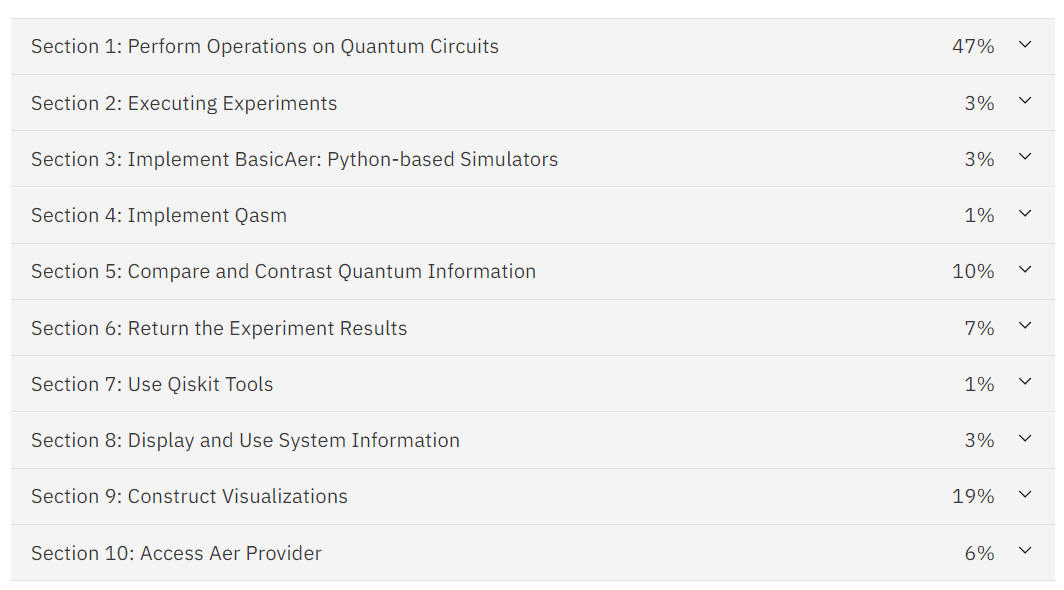

# Key References

- [Excellent Study Guide by James Weaverby James Weaver](https://slides.com/javafxpert/prep-qiskit-dev-cert-exam) it also goes over the sample exam.
- Qiskit Tools - https://qiskit.org/documentation/apidoc/tools.html
- Qiskit Quantum Information - https://qiskit.org/documentation/apidoc/quantum_info.html
- Qiskit QASM - https://qiskit.org/documentation/apidoc/qasm.html
- Qiskit Providers - https://qiskit.org/documentation/apidoc/providers.html
- Qiskit Execute - https://qiskit.org/documentation/apidoc/execute.html
- Qiskit Circuit - https://qiskit.org/documentation/apidoc/circuit.html
- Qiskit Visualization - https://qiskit.org/documentation/apidoc/visualization.html
- Transpilation - https://qiskit.org/documentation/apidoc/transpiler.html
- IBMQ Backend - https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html
- Working of Qiskit Backends - https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463
- Add Bartu's workbook 

### Imports

In [1]:
import numpy as np
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector


# Load your IBM Quantum account(s)
provider = IBMQ.load_account()

## Bell States with Statevector

In [2]:
# here we create the four bell states 

# This statevector object do not need simulation to get the information
bell1 = QuantumCircuit(2)
bell1.h(0)
bell1.cx(0,1)

sv = Statevector.from_label('00') # here .from_label() is used, we could also use .from_int(), for more check docs!
sv_ev1 = sv.evolve(bell1) # then evolve this initial state through the circuit, What is evolve ?
sv_ev1.draw('latex')

<IPython.core.display.Latex object>

In [3]:
bell2 = QuantumCircuit(2)
bell2.h(0)
bell2.cx(0,1)
bell2.z(0)

sv_ev2 = sv.evolve(bell2)
sv_ev2.draw('latex')

<IPython.core.display.Latex object>

In [4]:
bell3 = QuantumCircuit(2)
bell3.h(0)
bell3.x(1)
bell3.cx(0,1)

sv_ev3 = sv.evolve(bell3)
sv_ev3.draw('latex')

<IPython.core.display.Latex object>

In [5]:
bell4 = QuantumCircuit(2)
bell4.h(0)
bell4.x(1)
bell4.cx(0,1)
bell4.z(1)

sv_ev4 = sv.evolve(bell4)
sv_ev4.draw('latex')

<IPython.core.display.Latex object>

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


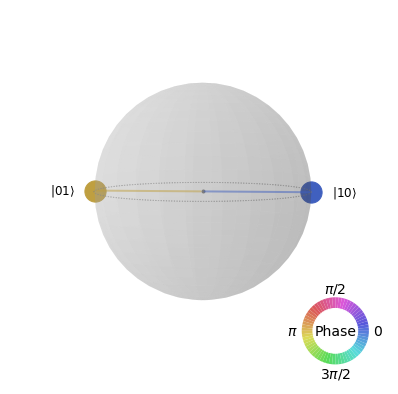

In [6]:
# the Statevector object can be drawn on a qsphere 
# with the .draw() method by changing the call from 'latex' to 'qsphere'
# this will NOT be the case once we move to statevectors from simulation

sv_ev1.draw('qsphere')
sv_ev2.draw('qsphere')
sv_ev3.draw('qsphere')
sv_ev4.draw('qsphere')

## Build GHZ State

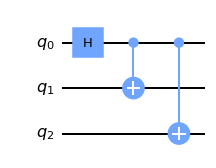

In [7]:
# What is GHZ State ? (Greenberger–Horne–Zeilinger state)

ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2]) # using []s notation we can apply 2 cx gates in same statement 
ghz.draw() # or use 'mpl' or 'text', leaving blank default uses mpl

In [8]:
sv = Statevector.from_int(0,2**3) # what is from _int ?
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [9]:
sv = Statevector.from_label('000') #doing the same with .from_label()
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

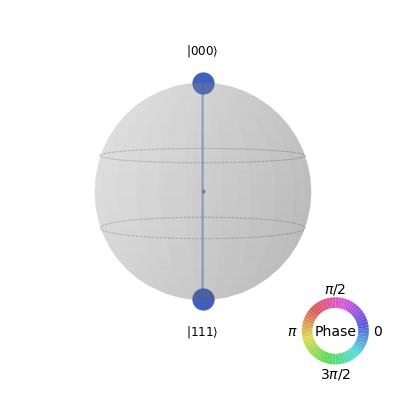

In [10]:
sv_ev.draw('qsphere')

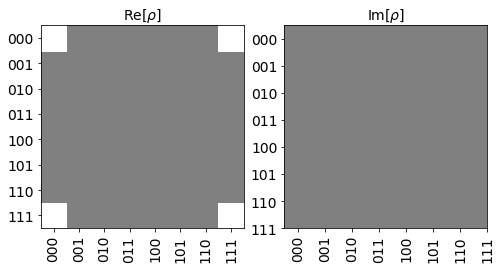

In [11]:
# we also have this feature for drawing a hinton directly!, What is Hinton ? is similar to city graph but flat & represent matrix density distribution
sv_ev.draw('hinton')

## Use statevector_simulator to create a statevector instead!

In [12]:
# BasicAer has 3 main simulators:
# 1-'qasm_simulator'
# 2-'statevector_simulator'
# 3-'unitary_simulator'

BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [13]:
backend_sv = BasicAer.get_backend('statevector_simulator') # get the statevector_simulator
job = execute(ghz, backend_sv, shots=1024) # specify job, which circuit to execute and how many times/shots
result = job.result() # results from the job
sv_ev2 = result.get_statevector(ghz) # get statevector from the result

# this way of getting the statevector does not have the method '.draw()' in order to visualize you need plotting functions directly

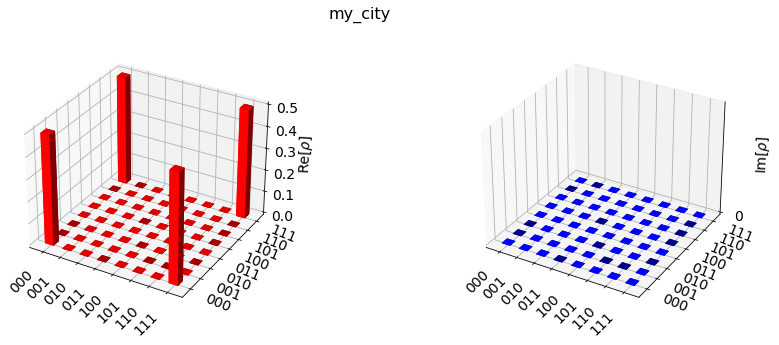

In [14]:
plot_state_city(sv_ev2, title='my_city',color=['red','blue'])

there are multiple ways of visualizing a state

1-Plotting the DensityMatrix as city plot


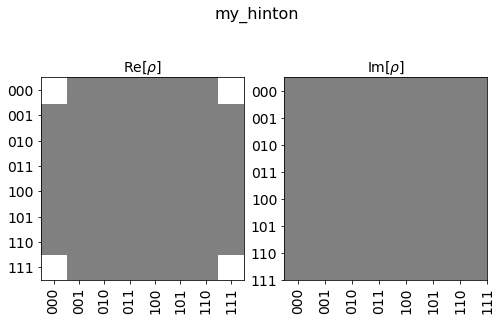

In [15]:
plot_state_hinton(sv_ev2, title='my_hinton')

2-Plot hinton graph

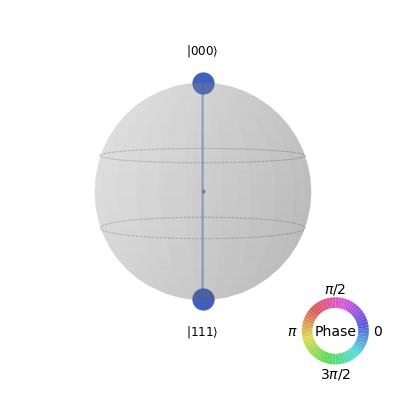

In [16]:
plot_state_qsphere(sv_ev2)

3-Plot QSphere

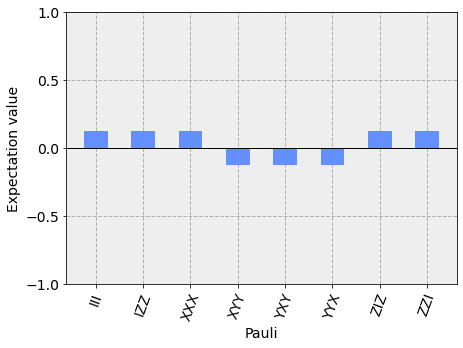

In [17]:
plot_state_paulivec(sv_ev2)

4-Plot we can also plot the Pauli Expectation Values

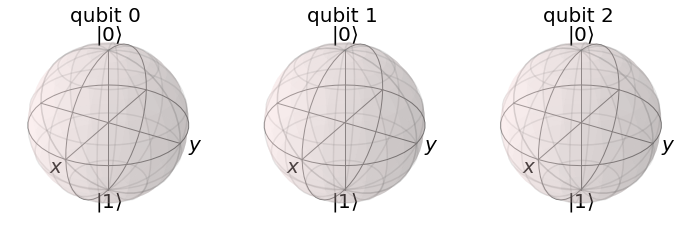

In [18]:
plot_bloch_multivector(sv_ev2)

5-Plot We can plot the Bloch Vectors for each qubit via Bloch_MULTIVECTOR

## Q What is the difference in the input between plot_bloch_multivector and plot_bloch_vector ?

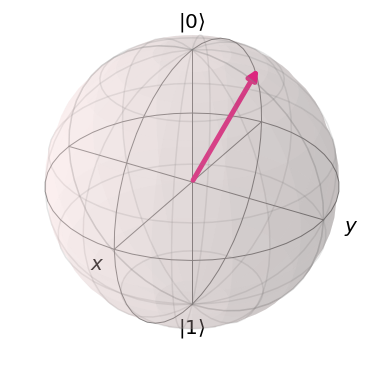

In [19]:
# The multivector as we saw plots a state coming from a circuit
# whereas the bloch_vector needs coordinate specifications there coordinates can be cartesian, or spherical

plot_bloch_vector([0,0.5,1])
# here for [x,y,z]; x=Tr[Xρ] and similar for y and z

## Q How to create Circuit with explicit Quantum Registers ?

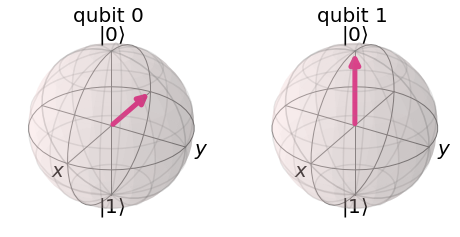

In [20]:
q_a = QuantumRegister(1,'q_a')
q_b = QuantumRegister(1, 'q_b')
qc = QuantumCircuit(q_a, q_b)
qc.h(0) 
qc.z(0) 

back = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back).result()
sv = result.get_statevector()
plot_bloch_multivector(sv)

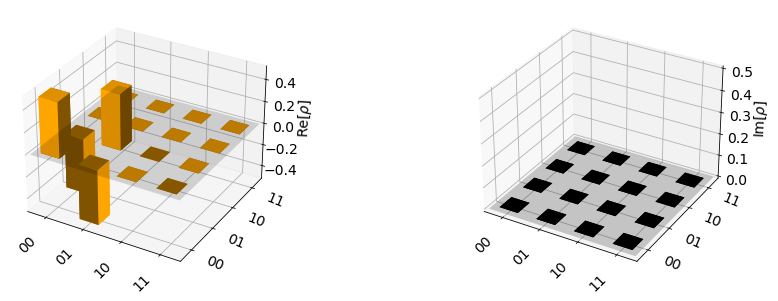

In [21]:
plot_state_city(sv, color=['orange','black'])

## Using qasm_simulator to actually run experiment and get the Probabilities!

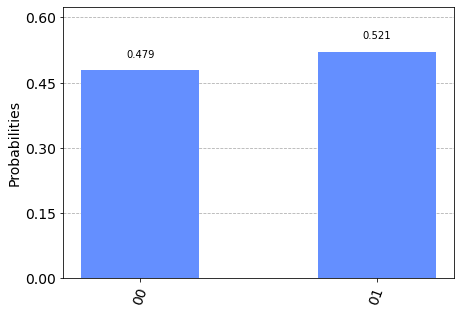

In [22]:
qc.measure_all() # measure_all() will create a classical register for a circuit that doesn't have one
#NOTE: this also means, if your circuit already had a classical register, it would create another one!
#so measure_all() is usually used for circuits that do not have a classical register

qasm_sim = BasicAer.get_backend('qasm_simulator')
result = execute(qc, qasm_sim).result() 
counts = result.get_counts() # this time, we are not getting the state, but the counts!
plot_histogram(counts)

## Extend a pre-defined circuit with 'compose'

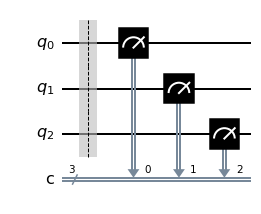

In [23]:
meas = QuantumCircuit(3,3) # Create a new quantum circuit just with a barrier and measurements
meas.barrier()
meas.measure([0,1,2],[0,1,2]) # here we measure respective quantum registers into respective classical registers, the ordering is important!
meas.draw('mpl')

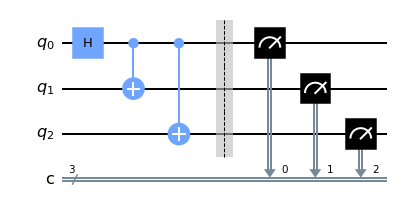

In [24]:
circ = meas.compose(ghz,range(3),front=True) # compose to extend the circuit the front=True gets GHZ before we measure
circ.draw('mpl')

In [25]:
backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend)
job = backend.run(circ, shots=1024) #notice here we use .run instead of execute most usually we employ 'execute' though because it is more flexible
result = job.result()
counts = result.get_counts()
print(counts) #now, we could also just print our counts in an un-spectacular way compared to plotting the histograms!

{'111': 513, '000': 511}


## Create real backend by provider, and monitor the job

In [26]:
import qiskit.tools.jupyter
#%qiskit_job_watcher #this creates a pop up of your jobs

Until now, we've used perfect, error-prone, noisless simulators; here we see a real machine, with all its errors!

In [27]:
from qiskit.tools import job_monitor
#quito = provider.get_backend('ibmq_quito') # to call a real backend QPU, we use 'provider' object instead of BasicAer you can check which backends are available for you too!
#job = execute(circ, quito)
#job_monitor(job)

In [28]:
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)

## We can also create operator forms of circuits

In [29]:
from qiskit.quantum_info import Operator
U = Operator(ghz) # we can turn our ghz circuit from above into an operator!
U.data
# this is very similar to getting the Statevector object directly, 


array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [30]:
# if needed we can round all these numbers by using np.around and specify how many decimals we want
np.around(U.data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

## We can do same with a unitary_sim same as statevector_sim!

In [78]:
backend_uni = BasicAer.get_backend('unitary_simulator') 
U = execute(ghz,backend_uni).result().get_unitary(decimals=3)
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [79]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(U, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

## Create a circuit with Q and C registers defined explicitly

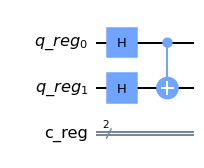

In [32]:
q = QuantumRegister(2,'q_reg')
c = ClassicalRegister(2,'c_reg')
qc = QuantumCircuit(q,c)
qc.h(q[0:2])
qc.cx(q[0], q[1])
qc.draw('mpl')

In [33]:
U_bell = Operator(qc)
np.around(U_bell.data,3) # rounding decimal places

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j]])

## We can also initialize a desired_state via initialize method, 
- As long as the desired_state is valid (the probabilities add up to 1) 
- We can also test the state_fidelity() method which checks if two states are the same!

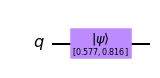

In [34]:
a = 1/np.sqrt(3) # we can define a state ourselves, we could also get a random state,
desired_state = [a,np.sqrt(1-a**2)] # state is defined such that it is a valid one!
q_reg = QuantumRegister(1,'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state,0)
qc.draw('mpl')

## Decompose

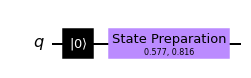

In [35]:
decomp = qc.decompose()
decomp.draw() #but what is this |0> ? It is a reset! Meaning that initialize as a whole is NOT a Gate!
#It is irreversible because it has a reset! check docs for more

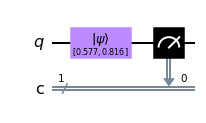

In [36]:
c_reg = ClassicalRegister(1,'c')
meas = QuantumCircuit(q_reg, c_reg)
meas.measure(0,0)
circ = meas.compose(qc, range(1), front=True)
circ.draw('mpl')

In [37]:
#squaring the amplitudes
alpha_squared = 0.577 **  2
beta_squared = 0.816 ** 2
print(alpha_squared, beta_squared, alpha_squared+beta_squared)

0.332929 0.6658559999999999 0.9987849999999998


In [38]:
back = BasicAer.get_backend('qasm_simulator')
job = execute(circ, back, shots=1000)
counts = job.result().get_counts()
print(counts)

{'1': 636, '0': 364}


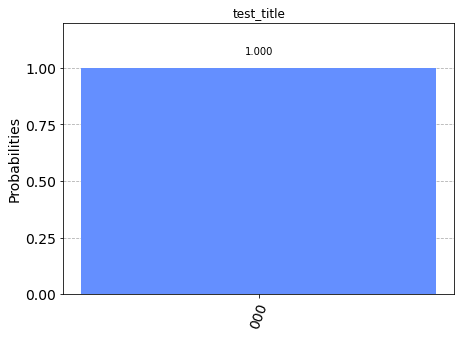

In [123]:
plot_histogram(counts,title='test_title')

## Fidelities

Quantum fidelity allows you to obtain a measurement of the amount of distance between two quantum gates, states, or processes.

A formal definition states that quantum fidelity is a measure of how “close” two quantum states are, in that one state will effectively identify as another.

As a rule of thumb, fidelity is simply measuring the amount of “noise” that you can expect between your code and actual physical quantum hardware.

Qiskit offers several methods for measuring fidelity, as available in qiskit.quantum_info.state_fidelity.

State fidelity measures between two quantum states (such as statevectors or density matrix objects).

Process fidelity measures the noise within a quantum channel or operator.

Average gate fidelity measures the fidelity of multiple gates within a quantum channel. Note, average gate fidelity requires the channel and target operator to have the same dimensions and input/output dimensions.

In [40]:
# state_fidelity

back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)
qc_sv

array([0.57735027+0.j, 0.81649658+0.j])

In [41]:
from qiskit.quantum_info import state_fidelity
state_fidelity(desired_state, qc_sv) 
# this compares the statevector we got from simulation vs. the state we wanted to initialize
# here we see they match perfectly, as expected

1.0

In [42]:
# average_gate_fidelity

from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

# these differ only by a phase so the gate and process fidelities are expected to be 1

a = average_gate_fidelity(op_a,op_b)
a

1.0

In [43]:
# process_fidelity

b = process_fidelity(op_a, op_b)
a == b

True

## We can also get the initializer in matrix form via. get_unitary()!

In [44]:
back_uni = BasicAer.get_backend('unitary_simulator')
job = execute(qc, back_uni)
result = job.result()
U_qc = result.get_unitary(decimals=3)
U_qc

array([[ 0.577+0.j, -0.816+0.j],
       [ 0.816+0.j,  0.577+0.j]])

## We can combine circuits to gates with .to_gate() method

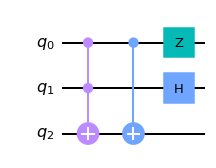

In [45]:
qc = QuantumCircuit(3)
qc.mct([0,1],2) # What does it do ?
qc.cx(0,2)
qc.h(1)
qc.z(0)
qc.draw('mpl')

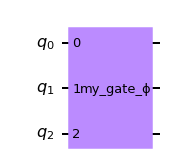

In [46]:
qc_gate = qc.to_gate()
qc_gate.name = 'my_gate_ϕ' # optionally we can give it a name!
circ = QuantumCircuit(3)
circ.append(qc_gate, [0,1,2])
circ.draw('mpl')

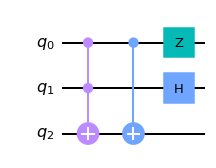

In [47]:
circ_decomp = circ.decompose() # and we can decompose it back!
circ_decomp.draw('mpl')

## Custom Controlled-Gates!

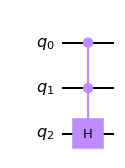

In [48]:
from qiskit.circuit.library import HGate
ch = HGate().control(2) # specify how many controls we want
qc = QuantumCircuit(3)
qc.append(ch, [0,1,2]) # the [a,b,c] correspond to controls and target respectively
qc.draw('mpl')

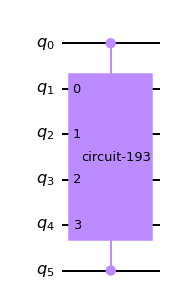

In [49]:
# another little more complex example 
circ = QuantumCircuit(4)
circ.h(range(2))
circ.cx(0,1)
circ.cx(0,3)
circ.crz(np.pi/2,0,2)

my_gate = circ.to_gate().control(2) #this 
qc = QuantumCircuit(6)
qc.append(my_gate, [0,5,1,2,3,4])
qc.draw()

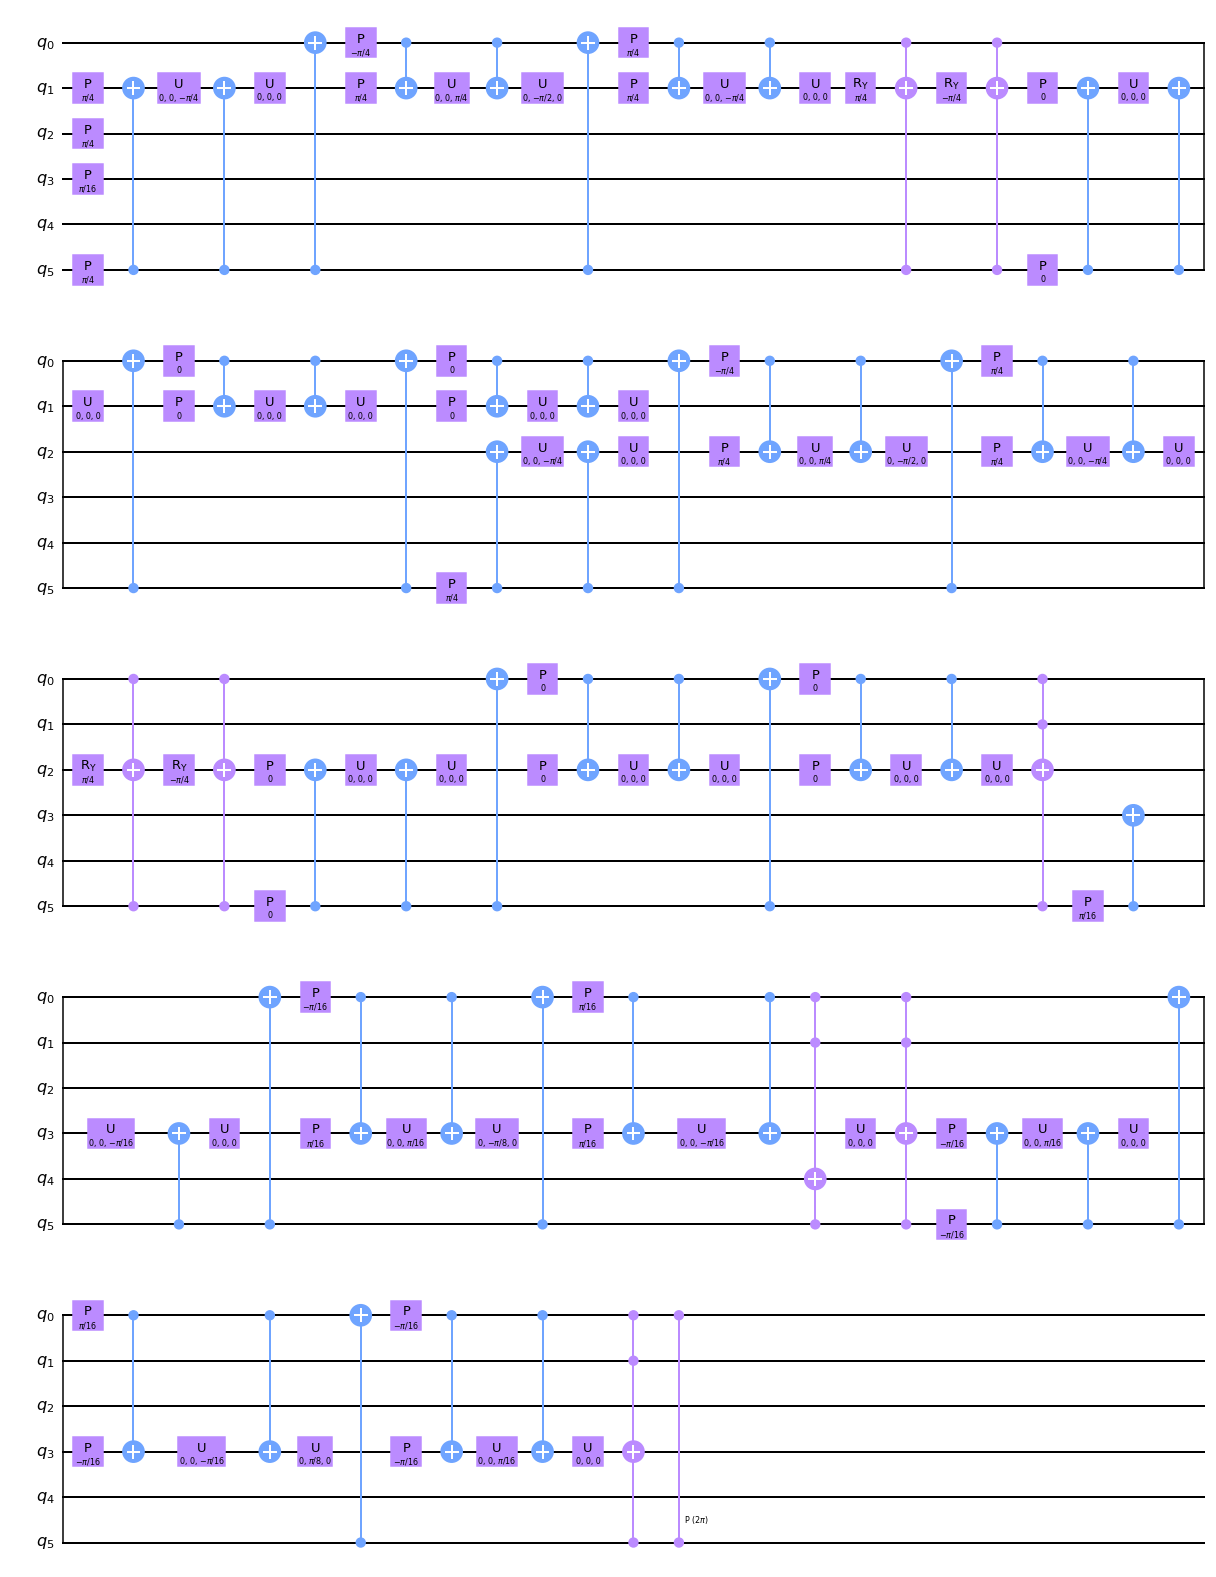

In [50]:
circ = qc.decompose()
circ.draw() 

# After creating a circuit, we can transpile it either for the backend or for a specific set of basis gates

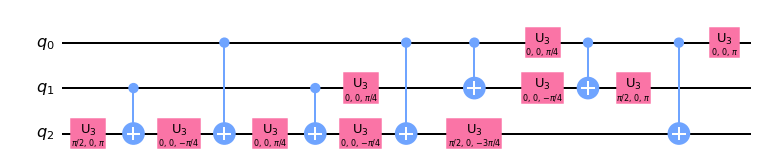

In [51]:
# Again simpler circuit!
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)

trans = transpile(qc, basis_gates = ['u3','cx','s'])
trans.draw('mpl')

# Advanced Circuit Visuals

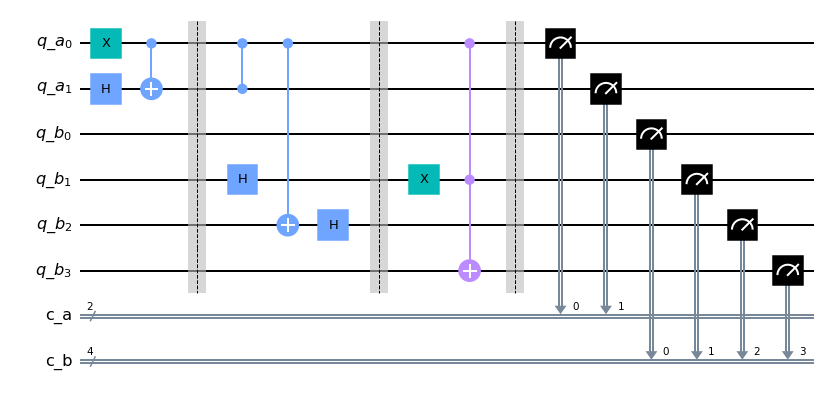

In [52]:
q_a = QuantumRegister(2, 'q_a')
q_b = QuantumRegister(4, 'q_b')
c_a = ClassicalRegister(2,'c_a')
c_b = ClassicalRegister(4,'c_b')

qc = QuantumCircuit(q_a, q_b,c_a, c_b)

qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.barrier()
qc.cz(0,1)
qc.cx(0,4)
qc.h(3)
qc.h(4)
qc.barrier()
qc.x(3)
qc.ccx(0,3,5)
qc.barrier()
qc.measure(q_a, c_a)
qc.measure(q_b, c_b)
qc.draw()

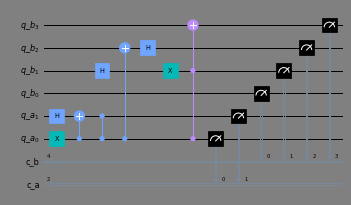

In [53]:
#Now look at all the crazy things we can do with the .draw() method! Who would've imagined!
qc.draw(reverse_bits=True, plot_barriers=False,scale=0.5, style = {'backgroundcolor': 'gray'})

In [54]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc, output='text') #oh and yeah, there is this, circuit_drawer- something to keep in mind!

┌───┐      ░                 ░            ░ ┌─┐               
q_a_0: ┤ X ├──■───░───■────■────────░────────■───░─┤M├───────────────
       ├───┤┌─┴─┐ ░   │    │        ░        │   ░ └╥┘┌─┐            
q_a_1: ┤ H ├┤ X ├─░───■────┼────────░────────┼───░──╫─┤M├────────────
       └───┘└───┘ ░        │        ░        │   ░  ║ └╥┘┌─┐         
q_b_0: ───────────░────────┼────────░────────┼───░──╫──╫─┤M├─────────
                  ░ ┌───┐  │        ░ ┌───┐  │   ░  ║  ║ └╥┘┌─┐      
q_b_1: ───────────░─┤ H ├──┼────────░─┤ X ├──■───░──╫──╫──╫─┤M├──────
                  ░ └───┘┌─┴─┐┌───┐ ░ └───┘  │   ░  ║  ║  ║ └╥┘┌─┐   
q_b_2: ───────────░──────┤ X ├┤ H ├─░────────┼───░──╫──╫──╫──╫─┤M├───
                  ░      └───┘└───┘ ░      ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_b_3: ───────────░─────────────────░──────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
                  ░                 ░      └───┘ ░  ║  ║  ║  ║  ║ └╥┘
c_a: 2/═════════════════════════════════════════════╩══╩══╬══╬══╬══╬═
                                                    0  1  ║  ║  ║  ║ 
                                                          ║  ║  ║  ║ 
c_b: 4/═══════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3

## Q How to export to QASM?

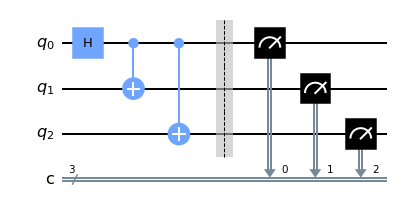

In [55]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [56]:
qasm_str = qc.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n'

## Q How to import from QASM?

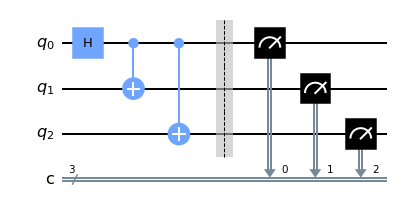

In [57]:
circ = QuantumCircuit.from_qasm_str(qasm_str) #you got to be kidding!
circ.draw() #you can also read a file directly with .from_qasm_file('path'), check out docs!

## Q How to find Circuit depth ?

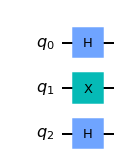

In [58]:
#what do you think the circuit depth of this picture is?
#hint: not 2

circ = QuantumCircuit(3)
circ.h(0)
circ.x(1)
circ.h(2)
circ.draw()

In [59]:
circ.depth()

1

In [60]:
qc =QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.barrier()
qc.cx(2,0)
qc.barrier() 

print(qc.depth()) # Barriers do not count for depth

5


## Q How to find Qiskit Version ?

In [61]:
qiskit.__version__ #no worries...

'0.20.2'

## I want to run on a real machine, but I also need some information about the connectivity? And maybe other things too?

In [62]:
# #this is your tool to get all the information on all the hardware available, check it for yourself!
# import qiskit.tools.jupyter
# %qiskit_backend_overview

## Q How to check the Connectivity of the Quantum Chip being Used

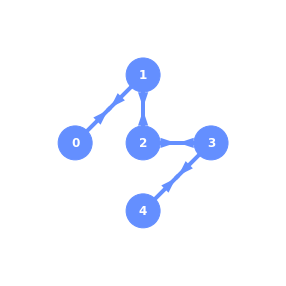

In [63]:
#that's not a problem!

from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend, plot_directed=True) #check other things you can do in this within docs!

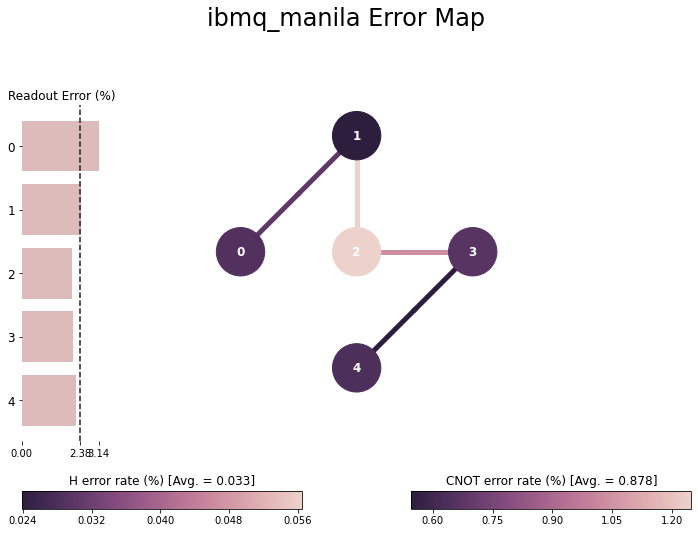

In [64]:
plot_error_map(backend) #I can also get my errors!

## Q How do we define Coupling ?

In [65]:
qc = QuantumCircuit(3)
qc.measure_all()
sim = BasicAer.get_backend('qasm_simulator')
couple_map = [[0,1],[1,2]] #specify some linear connection
job = execute(qc, sim, shots=1000, coupling_map=couple_map) #here is how you take that in execute also!
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 1000}


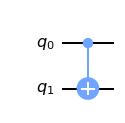

In [66]:
qc = QuantumCircuit(2)
qc.cx(0,1)

 ## you won't see the next line in the exam.
qc.draw('mpl')

## Q Which code fragment, when run inmediately after the code below will save the following PNG image to disk ?

- A. qc.draw('circuit_drawing.png')
- B. qc.write_drawing(format='png', name ='circuit_drawing')
- C. qc.draw('latex', filename ='circuit_drawing.png')
- D. qc.draw('mpl', filename ='circuit_drawing.png')

## Answer

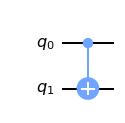

In [67]:
#Answer is D
qc.draw('mpl',filename='test.png') ## check the folder where the notebook is located

## Q What is Phase Kickback and how it is done Reversing a CNOT Gate?

It turns out that through a process called phase kickback we can take advantage of unique properties of a quantum circuit in superposition in order to allow multigate control operations to behave in reverse.

The key to implementing phase kickback in Qiskit, in order to reverse a multigate control operator, is to enclose the multigate operator within Hadamard gates. That is, both qubits should use double Hadamard gates with the control operator between them.


## Q What is The Difference between a Bloch sphere and a Q-sphere

Between the two visualizations, a Bloch sphere is useful for displaying information about a single qubit. A Q-sphere is useful for displaying information about multiple qubits together in an overall system.


## Q What are Plotting Gate Maps and Error Rates ?

A gate map shows the connections between nodes on a physical quantum computing device.

An error map shows both the node connections of a gate map, in addition to the error rate expected on the backend.



## Q Find the correct pauli vector for the code given below?

In [68]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

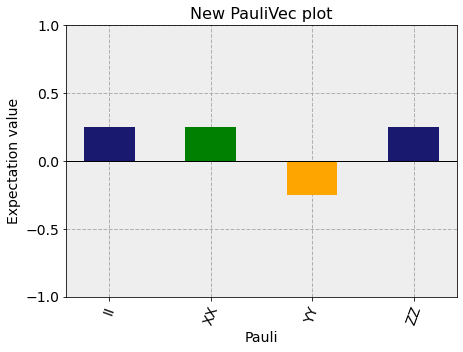

In [69]:
plot_state_paulivec(state, color=['midnightblue','green','orange'],title="New PauliVec plot")

In [70]:
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.cx(0,1)
qc.ccx(0,1,2)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
output = result.get_statevector()
output.draw('latex')

<IPython.core.display.Latex object>

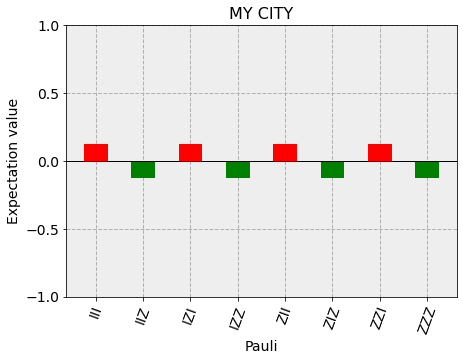

In [71]:
plot_state_paulivec(output, title = 'MY CITY', color = ['red','green'])

In [81]:
# 21)  Which one of the following output results are correct when the given code is executed?

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.x(q[1])
qc.h(q[1])

sim = Aer.get_backend('unitary_simulator')
job = execute(qc, sim)
unitary = job.result().get_unitary()
unitary

Operator([[ 0.5+0.00000000e+00j,  0.5-6.12323400e-17j,
            0.5+6.12323400e-17j,  0.5+2.79557852e-33j],
          [ 0.5+0.00000000e+00j, -0.5+6.12323400e-17j,
            0.5+6.12323400e-17j, -0.5+2.30999782e-33j],
          [-0.5-6.12323400e-17j, -0.5-2.79557852e-33j,
            0.5+1.22464680e-16j,  0.5+6.12323400e-17j],
          [-0.5-6.12323400e-17j,  0.5-2.30999782e-33j,
            0.5+1.22464680e-16j, -0.5-6.12323400e-17j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [82]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [105]:
# 22)  Which one of the following output results are correct when the given code is executed?
qc = QuantumCircuit(2,2)
qc.h(0)
qc.z(1)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector()
print(statevector)

Statevector([ 0.70710678+0.j,  0.70710678+0.j, -0.        +0.j,
             -0.        +0.j],
            dims=(2, 2))


In [106]:
array_to_latex(statevector, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [113]:
# 37) When executed, which one of the following codes produces the given image?
qc = QuantumCircuit(2,2)
qc.x(0)
qc.h(1)
qc.crz(np.pi,0,1)
qc.measure([0,1],[0,1])

#qc.draw('mpl')
#qc.draw()
#qc.draw('latex')
qc.draw('text')


┌───┐         ┌─┐   
q_0: ┤ X ├────■────┤M├───
     ├───┤┌───┴───┐└╥┘┌─┐
q_1: ┤ H ├┤ Rz(π) ├─╫─┤M├
     └───┘└───────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1

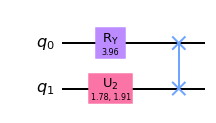

In [134]:
# 42) Which one of the following codes will create a random circuit?
from qiskit.circuit.random import random_circuit
#circ = random_circuit(2, 2, reset=reset, measure=True)
#circ = random_circuit(2, 2,conditional=True, measurement=measure)
circ = random_circuit(2, 2, measure=False)
#circ = random_circuit(2, 2, max_operands=True)
circ.draw()